In [36]:
import pandas as pd
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import bokeh
import os
import openai
from openai import OpenAI
import backoff
import numpy as np
from sklearn.cluster import KMeans
from bokeh.plotting import figure, show, ColumnDataSource, output_file, save
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from bokeh.models import HoverTool
from bokeh.palettes import Category20
import json
import plotly.express as px
import plotly.graph_objects as go
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pickle
import json

In [37]:
# Load embeddings file

# input the path to your saved embeddings
path = '/Users/ellenbowen/Desktop/Michigan/Siwo_lab/'
file = str(path) + 'phecode_gpt_embedding.pkl'

df = pd.read_pickle(file)


In [38]:
df

,phecode,phenotype,phecode_exclude_range,sex,rollup,leaf,category_number,category,embeddings
0,8.00,Intestinal infection,001-009.99,NaN,1,0,1,infectious diseases,"[0.0068802302703261375, 0.0005461262771859765,..."
1,8.50,Bacterial enteritis,001-009.99,Both,1,0,1,infectious diseases,"[-0.010700925253331661, 1.566567698318977e-05,..."
2,8.51,Intestinal e.coli,001-009.99,Both,1,1,1,infectious diseases,"[0.01900758408010006, -0.0076250554993748665, ..."
3,8.52,Intestinal infection due to C. difficile,001-009.99,Both,1,1,1,infectious diseases,"[0.013732682913541794, -0.013513063080608845, ..."
4,8.60,Viral Enteritis,001-009.99,Both,1,1,1,infectious diseases,"[-0.01282576099038124, -0.0019294519443064928,..."
...,...,...,...,...,...,...,...,...,...
1861,994.00,Sepsis and SIRS,994-994.99,NaN,1,0,18,injuries & poisonings,"[-0.009411283768713474, -0.011322950012981892,..."
1862,994.10,Systemic inflammatory response syndrome (SIRS),994-994.99,Both,1,1,18,injuries & poisonings,"[-0.036918796598911285, -0.012674717232584953,..."
1863,994.20,Sepsis,994-994.99,Both,1,0,18,injuries & poisonings,"[0.004166525788605213, -0.005852119065821171, ..."
1864,994.21,Septic shock,994-994.99,Both,1,1,18,injuries & poisonings,"[-0.012952380813658237, 0.0007000957266427577,..."


In [39]:
# Ensure df is the cleaned version without NaN in 'category'
df_cleaned = df.dropna(subset=['category'])
unique_categories = df_cleaned['category'].unique()

# Fit the embeddings with tSNE or

In [11]:
# '''
# This code grabs all of the embeddings and then fits them to t-SNE 
# '''

# embeddings = np.array(df['embeddings'].tolist())

# # Initialize t-SNE
# tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)

# # Run t-SNE on the embeddings
# embedded_vectors = tsne.fit_transform(embeddings)

In [12]:
# # Save embedded_vectors and tsne model
# with open('embedded_vectors_phecode.pkl', 'wb') as file:
#     pickle.dump(embedded_vectors, file)

# with open('tsne_model_phecode.pkl', 'wb') as file:
#     pickle.dump(tsne, file)

# Load tsne and embedded vector

In [40]:
# Load the embedded vectors

with open(str(path) + 'embedded_vectors_phecode.pkl', 'rb') as file:
    embedded_vectors = pickle.load(file)

# If you also need to load the fitted model
with open(str(path)+'tsne_model_phecode.pkl', 'rb') as file:
    tsne = pickle.load(file)

# t-SNE static plot

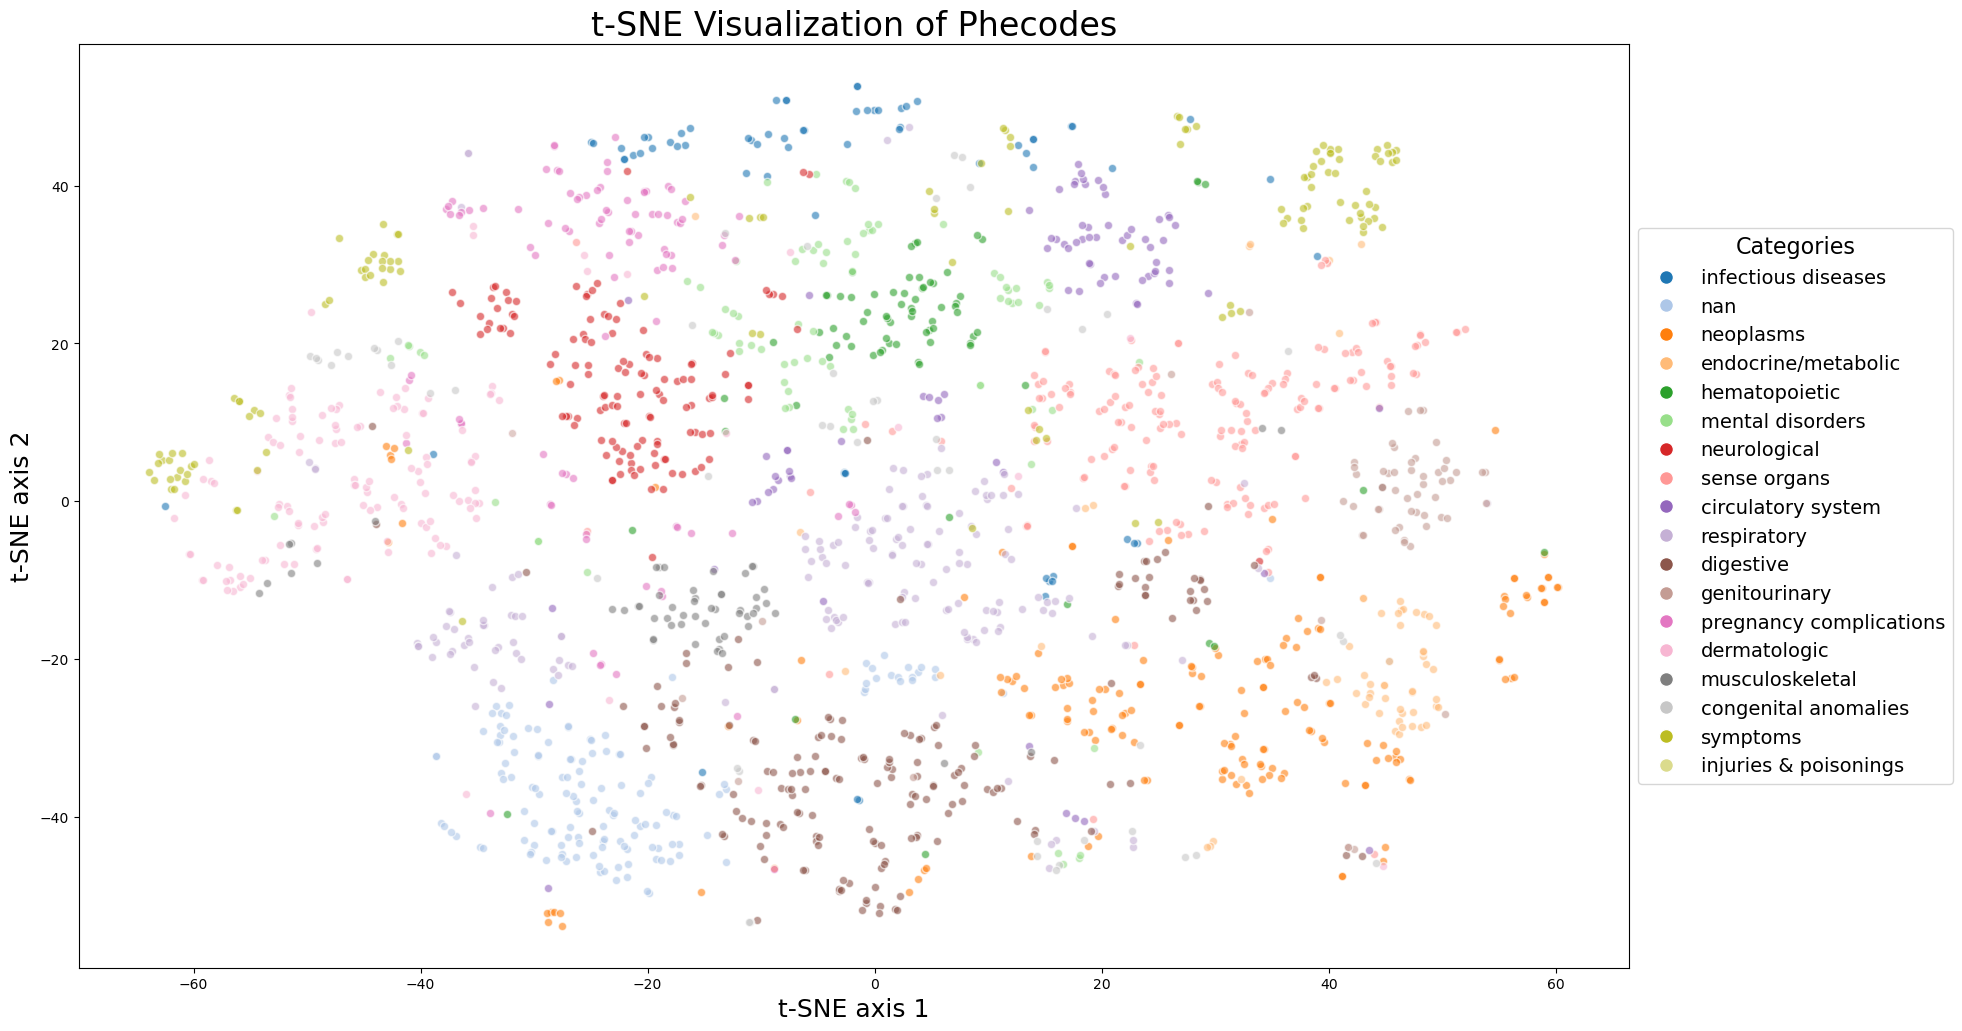

In [36]:
'''
Create static t-SNE plot using matplotlib with category labels
'''

# Create a figure and axis object with a larger figure size
fig, ax = plt.subplots(figsize=(20, 12))  # Increased figure size

# Use the tab20 colormap for the first 20 categories
palette = plt.get_cmap('tab20')

# Manually define additional distinct, colorblind-friendly colors

custom_colors = [
    '#D9AF6B',  # Tan
    '#829356',  # Olive Green
    '#D16969',  # Soft Red
    '#decbe4',  # Pale Lavender
    '#e5d8bd',  # Pale Sand
    '#fddaec',  # Pale Pink
]
# all_custom_colors = [
#     '#a65628',  # Sienna (reddish-brown)
#     '#984ea3',  # Dark Lavender (purplish-blue)
#     '#6C8EBF',  # Blue-ish
#     '#D9AF6B',  # Tan
#     '#829356',  # Olive Green
#     '#4B4B8F',  # Indigo
#     '#D16969',  # Soft Red
#     '#decbe4',  # Pale Lavender
#     '#ccebc5',  # Pale Green
#     '#ffed6f',  # Pastel Yellow
#     '#e5d8bd',  # Pale Sand
#     '#fddaec',  # Pale Pink
# ]


# Plot each category with a unique color
for i, category in enumerate(unique_categories):
    indices = df['category'] == category
    if i < 20:
        # Use colors from the tab20 colormap
        color = palette(i)
    else:
        # Use the custom colors for categories beyond the 20th
        color = custom_colors[i - 20]
        
    ax.scatter(embedded_vectors[indices, 0], embedded_vectors[indices, 1], 
               color=color, label=category, alpha=0.6, edgecolor='w')

# Customize the plot
ax.set_title('t-SNE Visualization of Phecodes', fontsize=24)
ax.set_xlabel('t-SNE axis 1', fontsize=18)
ax.set_ylabel('t-SNE axis 2', fontsize=18)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=category,
                          markerfacecolor=palette(i) if i < 20 else custom_colors[i - 20], markersize=10)
                   for i, category in enumerate(categories)]

ax.legend(handles=legend_elements, title='Categories', title_fontsize='16', fontsize='14',
          loc='center left', bbox_to_anchor=(1, 0.5))


# Save the figure
plt.savefig('/Users/ellenbowen/Desktop/Michigan/Siwo_lab/AIM_conference/Plots/tsne_static_visualization_phecodes.png', bbox_inches='tight', dpi=300)

# Show the plot in a new window
plt.show()






# Interactive t-SNE plot

In [11]:
'''
Define a color palette for Plotly that is colorblind friendly based on tab20 and 
also includes 5 extra colors
'''

# Manually defined tab20 colors
tab20_colors = [
    '#1f77b4', '#aec7e8',  # Blue
    '#ff7f0e', '#ffbb78',  # Orange
    '#2ca02c', '#98df8a',  # Green
    '#d62728', '#ff9896',  # Red
    '#9467bd', '#c5b0d5',  # Purple
    '#8c564b', '#c49c94',  # Brown
    '#e377c2', '#f7b6d2',  # Pink
    '#7f7f7f', '#c7c7c7',  # Grey
    '#bcbd22', '#dbdb8d',  # Olive
    '#17becf', '#9edae5'   # Cyan
]

# Custom colors
custom_colors = [
    '#D9AF6B',  # Tan
    '#829356',  # Olive Green
    '#D16969',  # Soft Red
    '#decbe4',  # Pale Lavender
    '#e5d8bd',  # Pale Sand
    '#fddaec'   # Pale Pink
]

# Combine tab20 colors with custom colors
all_colors = tab20_colors + custom_colors



In [45]:
'''
Make interactive t-SNE using Plotly
'''

# Generate hover text for each point
hover_text = df.apply(lambda row: f"Phecode: {row['phecode']}<br>Phenotype: {row['phenotype']}", axis=1)

fig = go.Figure()

for i, category in enumerate(unique_categories):
    # Select data for each category
    category_data = df[df['category'] == category]
    category_embedded = embedded_vectors[category_data.index]
    
    # Use the combined list of colors for the plot
    color = all_colors[i % len(all_colors)]  # Ensure cycling through the colors if more categories than colors

    # Add a trace for each category with the corresponding color and hover text
    fig.add_trace(go.Scatter(
        x=category_embedded[:, 0],
        y=category_embedded[:, 1],
        mode='markers',
        marker=dict(color=color),  # Use the color from the combined color list
        name=category,  # This name appears in the legend
        text=hover_text[category_data.index],  # Hover text for points in this category
        hoverinfo='text'
    ))

# Customize hover label font size
fig.update_traces(hoverlabel=dict(font_size=12))

# Update the layout for better readability
fig.update_layout(
    title='t-SNE Visualization of Phecodes',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    hovermode='closest',
    legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0.5)'),  # Adjust legend position if necessary
)

fig.show()



In [47]:
# save the plot 
fig.write_html("/Users/ellenbowen/Desktop/Michigan/Siwo_lab/AIM_conference/Plots/tsne_phecodes.html")



# Simple kmeans and t-SNE

In [44]:
# Assuming 'embedded_vectors' is already defined as your t-SNE output

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=0)
cluster_labels = kmeans.fit_predict(embedded_vectors)

# Now generate the hover text for each point, as before
hover_text = df.apply(lambda row: f"Phecode: {row['phecode']}<br>Phenotype: {row['phenotype']}", axis=1)

# Create a Plotly figure
fig = go.Figure()

# Use a color scale for the clusters
color_scale = px.colors.qualitative.Set3  # You can choose another color scale if you prefer

# Plot each cluster with its own color and hover text
for cluster_id in range(10):
    # Points belonging to the current cluster
    points_in_cluster = embedded_vectors[cluster_labels == cluster_id]
    
    fig.add_trace(go.Scatter(
        x=points_in_cluster[:, 0],
        y=points_in_cluster[:, 1],
        mode='markers',
        marker=dict(
            color=color_scale[cluster_id % len(color_scale)],  # Use the color scale
            size=8,
        ),
        name=f'Cluster {cluster_id}',  # Label each cluster
        text=hover_text[cluster_labels == cluster_id],  # Hover text for points in this cluster
        hoverinfo='text'
    ))

# Customize hover label font size
fig.update_traces(hoverlabel=dict(font_size=12))

# Update the layout for better readability
fig.update_layout(
    title='KMeans t-SNE Visualization of Phecodes',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    hovermode='closest'
)

# Show the figure
fig.show()


/Users/ellenbowen/opt/anaconda3/envs/ehail/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [62]:
# save the plot 
fig.write_html("/Users/ellenbowen/Desktop/Michigan/Siwo_lab/AIM_conference/Plots/Kmeans_tsne_phecodes_cluster.html")



# Kmeans and t-SNE with labels

In [42]:
'''
Get a list of all the phenotypes within a particular cluster
'''
# Filter the DataFrame to only include rows from the chosen cluster

def cluster_items_dict(df, n_clusters):
    cluster_dict = {}
    for cluster_number in range(n_clusters):
        phenotypes_in_cluster = df[cluster_labels == cluster_number]['phenotype'].tolist()
        cluster_dict[cluster_number] = phenotypes_in_cluster
    
    return cluster_dict

n_clusters = 10
cluster_dict = cluster_items_dict(df, n_clusters)
json_string = json.dumps(cluster_dict)

# save cluster_dict  as a pkl file
with open('cluster_' + str(n_clusters)+'_dict_phecodes.pkl', 'wb') as file:
    pickle.dump(cluster_dict, file)

# Write the JSON string to a text file
with open('cluster_' + str(n_clusters)+'_dict_phecodes.txt', 'w') as f:
    f.write(json_string)


In [52]:
'''
Define cluster names using chatGPT one word summaries of the contents of each cluster
'''

cluster_names = [
    "Infectious-Neurological",  # Cluster 0
    "Oncological-Endocrine",  # Cluster 1
    "Musculoskeletal",  # Cluster 2
    "Metabolic",  # Cluster 3
    "Cardiovascular",  # Cluster 4
    "Neoplastic",  # Cluster 5
    "Sensory-External",  # Cluster 6
    "Infectious-Systemic",  # Cluster 7
    "Neuro-Sensory",  # Cluster 8
    "Hepatorenal"  # Cluster 9
]


In [53]:

# Initialize the figure
fig = go.Figure()

# Plot points colored by disease category with hoverable text
for i, category in enumerate(df['category'].unique()):
    category_data = df[df['category'] == category]
    category_embedded = embedded_vectors[category_data.index]
    
    # Generate hover text for each point
    hover_texts = category_data.apply(lambda row: f"Phecode: {row['phecode']}<br>Phenotype: {row['phenotype']}", axis=1)
    
    fig.add_trace(go.Scatter(
        x=category_embedded[:, 0], y=category_embedded[:, 1],
        mode='markers',
        marker=dict(color=all_colors[i % len(all_colors)]),
        name=category,
        text=hover_texts,  # Assign hover text for each point
        hoverinfo='text+name'  # Display hover text and the trace name
    ))
    
# Calculate centroids in the t-SNE space
centroids = kmeans.cluster_centers_

# Annotations for cluster names
annotations = [dict(
    x=centroid[0], y=centroid[1],
    xref="x", yref="y",
    text=cluster_names[i],  # Cluster name as annotation text
    font=dict(color="white", size=12),
    align="center",
    bgcolor="black",  # Black background
    showarrow=True,
    arrowhead=7,
    ax=0,
    ay=-30,  # Adjust this offset to help with positioning
    arrowcolor="black"
) for i, centroid in enumerate(centroids)]

# Customize the layout with annotations
fig.update_layout(
    title='t-SNE Phecode Visualization with Disease Categories and KMeans Clustering',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    hovermode='closest',
    legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0.5)'),
    annotations=annotations  # Add the customized annotations
)

# Show the figure
fig.show()


In [54]:
# save the plot 
fig.write_html("/Users/ellenbowen/Desktop/Michigan/Siwo_lab/AIM_conference/Plots/kmeans_tsne_phecodes_cluster_labels_2.html")
